In [73]:
%reload_ext autoreload
%autoreload 2

from brian2 import *
from plotlib import *
from tqdm import tqdm
from pci import *
from multiprocessing import Pool
from itertools import product

import experiment_10_full_ping_connectome as ex10


In [92]:
start, end = 1000, 5000
dt, shift = 5, 5
n_mod = 1000
with_tms = True
duration = 2000

def runexp(arg):
    scaling, with_tms = arg
    return ex10.run_experiment(
        n_mod=n_mod,
        with_tms=with_tms,
        duration=duration,
        inter_scaling=scaling,
        poisson_input=False
    )

p = Pool(4)
args = list(product([50, 100], [True, False]))
args = list(product([50, 100], [True]))
data_array = p.map(runexp, args)
                   
p.close()

#data1, data2, data3, data4 = data_array



Setting up synapses... 
Setting up synapses... 
	EX_IN_SYN... 	EX_IN_SYN... (279,363 synapses) [0.97s]
(279,363 synapses) [0.97s]
	IN_EX_SYN... 	IN_EX_SYN... (399,200 synapses) [1.07s]
(399,200 synapses) [1.07s]
	IN_IN_SYN... 	IN_IN_SYN... (99,800 synapses) [0.31s]
(99,800 synapses) [0.31s]
	INTER_EX_EX_SYN... 	INTER_EX_EX_SYN... (5,713,203 synapses) [32.17s]
	TMS Spike Generator...  [0.03s]
	TMS_EX_SYN... (40 synapses) [0.01s]
	TMS_IN_SYN... (10 synapses) [0.01s]
All synapses created [34.63s]
Supplying Poisson input to network...  [0.00s]
Running sym... (5,713,203 synapses) [32.29s]
	TMS Spike Generator...  [0.03s]
	TMS_EX_SYN... (40 synapses) [0.01s]
	TMS_IN_SYN... (10 synapses) [0.01s]
All synapses created [34.76s]
Supplying Poisson input to network...  [0.00s]
Running sym...  [14.74s]
 [26.31s]


In [93]:
# pre, post, lz = pci(data1, dt, shift)
# pre2, post2, lz2 = pci(data2, dt, shift)
for d, arg in zip(data_array, args):
    _, _, lz = pci(d, dt, shift)
    print("Scaling: {}, with_tms: {}".format(arg[0], arg[1]))
    print('LZ comp: {}'.format(lz))


Binary data length: 59880
Scaling: 50, with_tms: True
LZ comp: 0.00128591658099
Binary data length: 59880
Scaling: 100, with_tms: True
LZ comp: 0.0753179711723


Scaling: 50, with_tms: True
60,285 exc spikes, 44,443 inh spikes


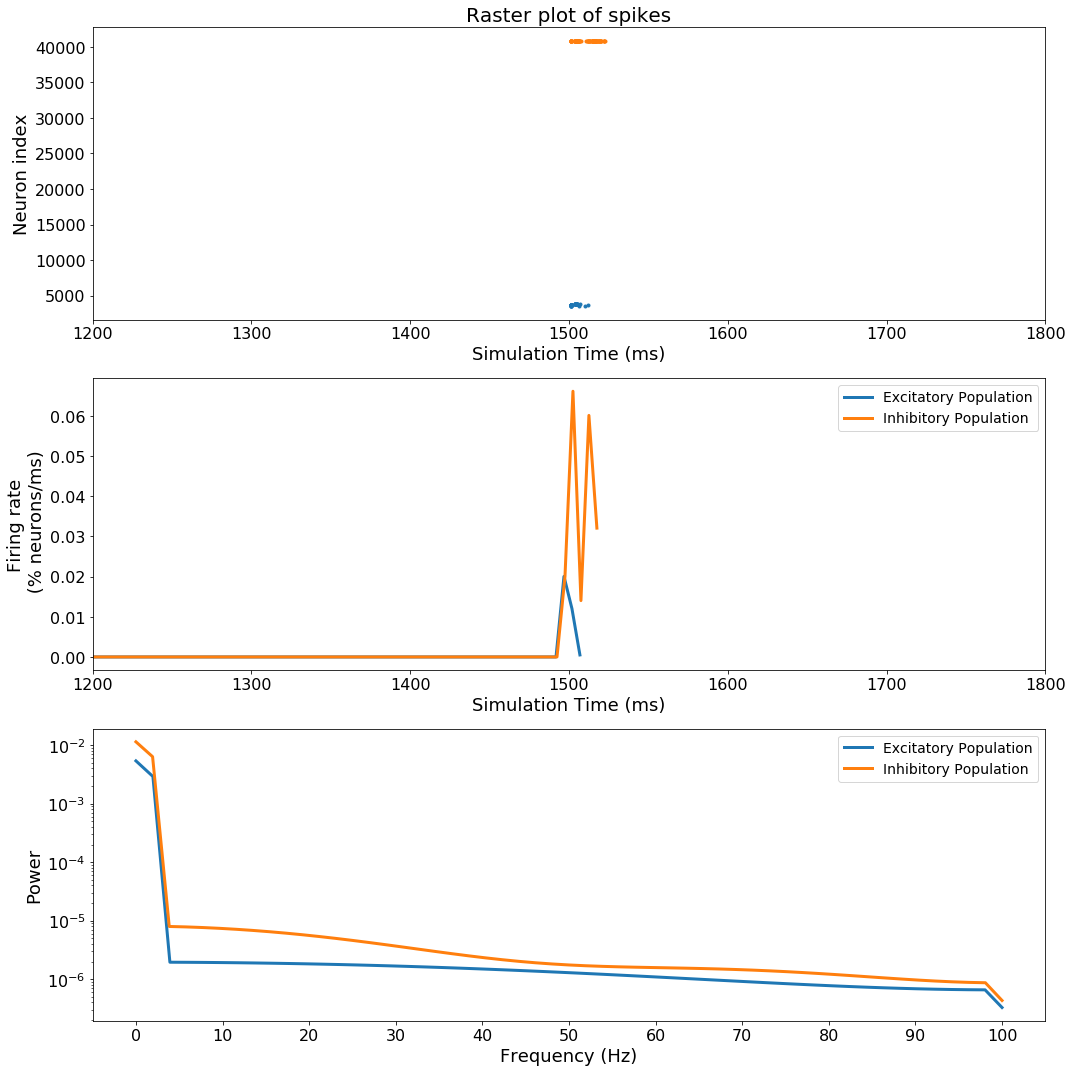

Scaling: 100, with_tms: True
2,096,017 exc spikes, 712,970 inh spikes


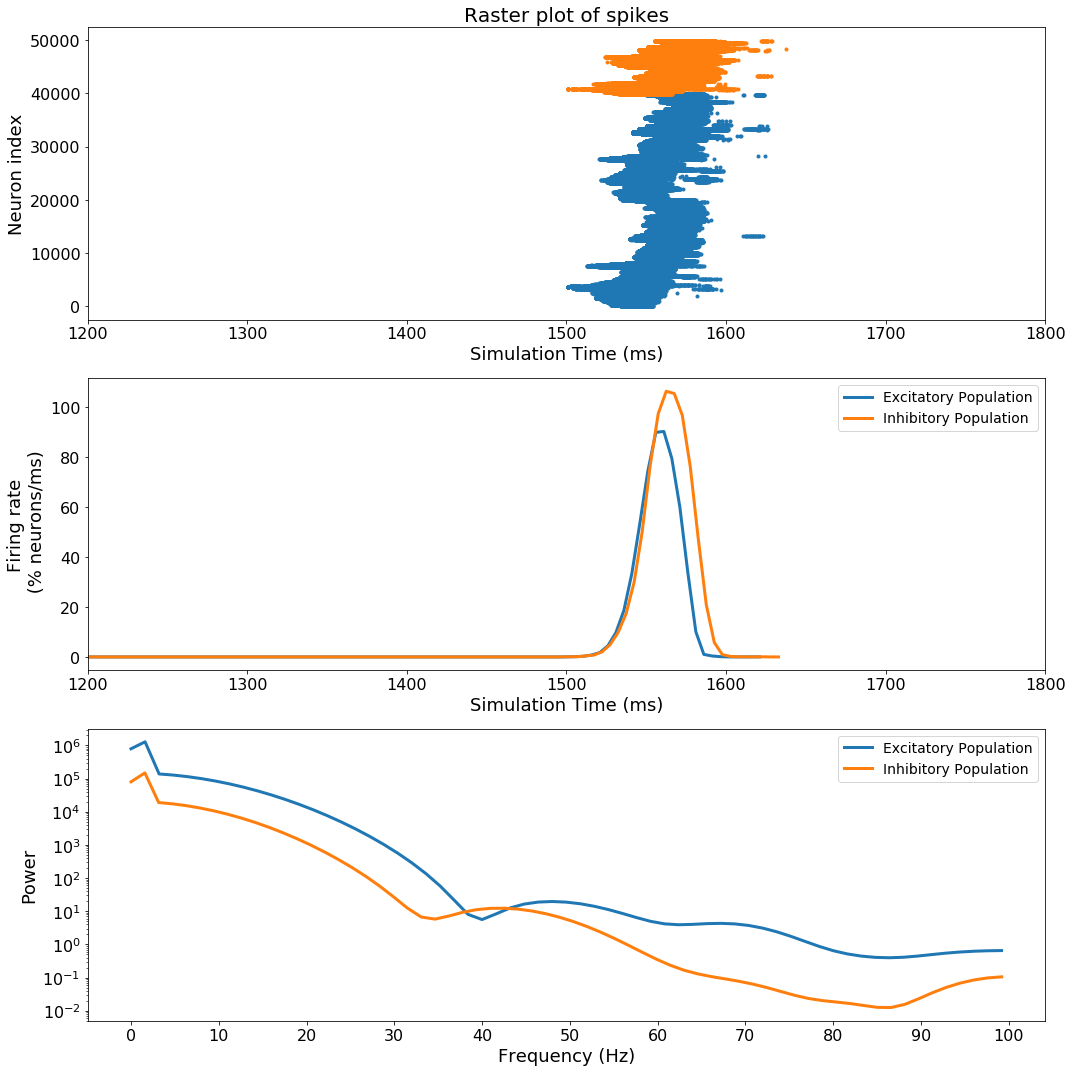

In [96]:

for d, arg in zip(data_array, args):
    print("Scaling: {}, with_tms: {}".format(arg[0], arg[1]))
    #plot_stuff(d, min_mod=85, max_mod=95, start=1200, end=1800)
    plot_stuff(d, start=1200, end=1800)


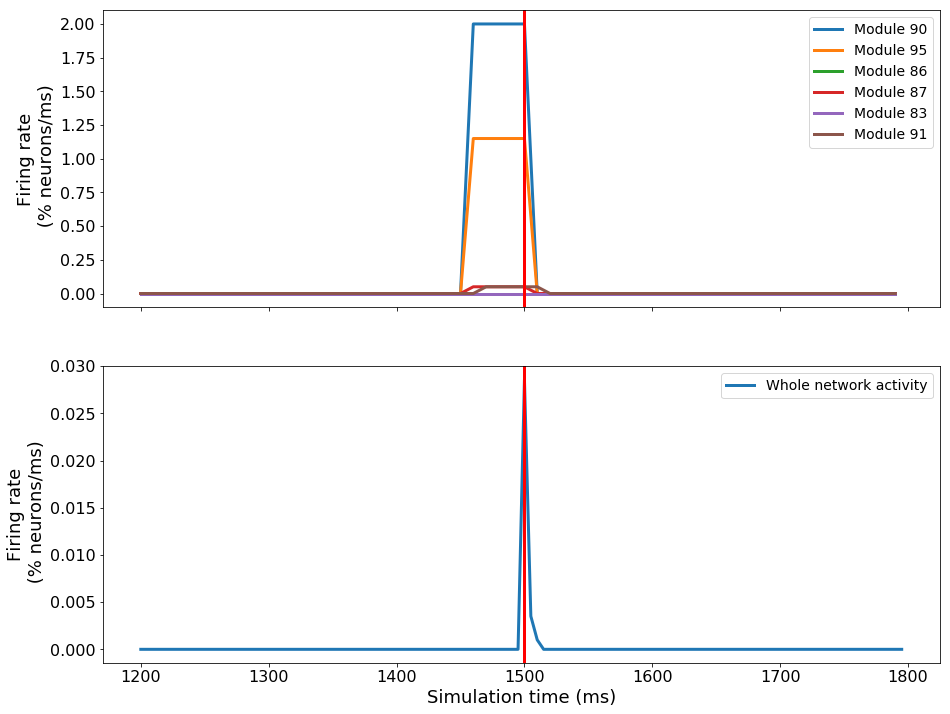

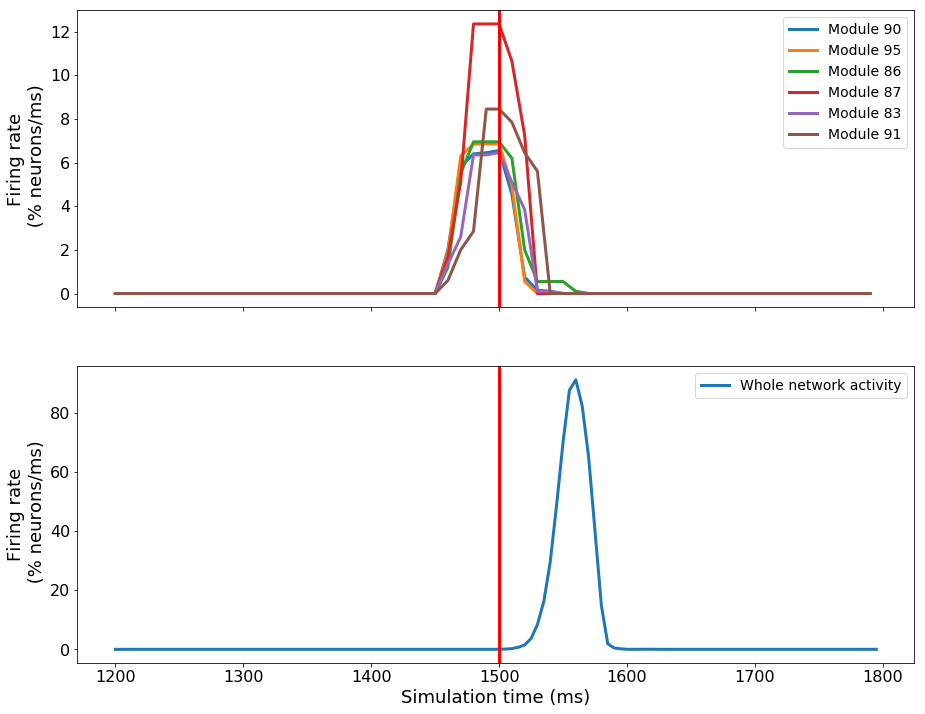

In [97]:
mods = np.array([90, 95, 86, 87, 83, 91])
all_elts = np.array([True for _ in range(998)])
all_elts = np.ones(998).astype(bool)
all_elts[mods] = False
rest = np.arange(998)[all_elts]
dt, shift = 5, 5
start=1200
end=1800
for d in data_array:
    _, axarr = plt.subplots(2, sharex=True, figsize=(15,12))
    plot_modules(d, mods, dt, shift, start=1200, end=1800, ax=axarr[0])
    x = d['X']
    n_ex = d['n_ex']
    plot_ma(n_ex, x, dt, shift, start=1200, end=1800, ax=axarr[1], label='Whole network activity')
    axarr[0].legend()
    axarr[0].axvline(x=1500, ls='-', color='r')
    axarr[1].legend()
    axarr[1].axvline(x=1500, ls='-', color='r')
    axarr[1].set_xlabel('Simulation time (ms)')
    
#plt.savefig('figures/TMS_modules_vs_whole_network.png')
plt.show()


Scaling: 50, with_tms: True
Scaling: 100, with_tms: True


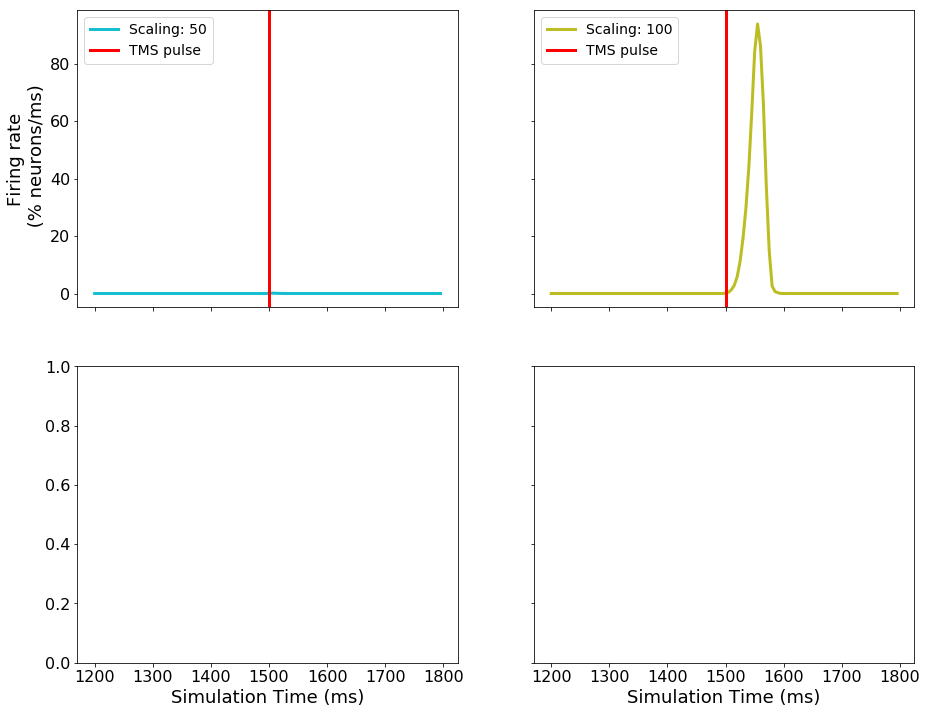

In [91]:
_, axarr = plt.subplots(2, 2, figsize=(15, 12), sharex=True, sharey='row')
#data_shuffled = [data_array[i] for i in [0, 2, 1, 3]]
for i, xs in enumerate(zip(data_array, args, axarr.flatten())):
    d, arg, ax = xs
    x = d['X']
    #dt, shift = 20, 10
    dt, shift = 5, 5 
    print("Scaling: {}, with_tms: {}".format(arg[0], arg[1]))
    plot_ma(998*40, x, dt, shift, ax=ax, start=1200, end=1800,
            label='Scaling: {}'.format(arg[0]),
            color='C{}'.format(9-i)
           )
    if arg[1]:
        ax.axvline(x=1500, ls='-', color='r', label='TMS pulse')
    else:
        ax.axvline(x=1500, ls='--', color='r', label='No TMS')
    ax.legend(loc=2)
axarr[0,1].set_ylabel('')
axarr[1,1].set_ylabel('')
axarr[1,0].set_xlabel('Simulation Time (ms)')
axarr[1,1].set_xlabel('Simulation Time (ms)')
#plt.savefig('figures/TMS_effect.png')
plt.show()